In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

## 0706

In [3]:
#Load data
ni = 11
nf = 19
n = nf-ni
data = [np.load('data/da_0706_{}.npz'.format(i)) for i in np.arange(ni,nf)]

In [4]:
t_max = 1325
u_fft = 0

for i in range(n):
    u_fft += data[i]['u_fft'][:t_max]

u_fft /= n
u_fft [:,0] = 0

In [6]:
t_max = 1325
u_fft1 = 0

for i in range(n):
    u_fft1 += data[i]['u_fft1'][:t_max]

u_fft1 /= n
u_fft1 [:,0] = 0

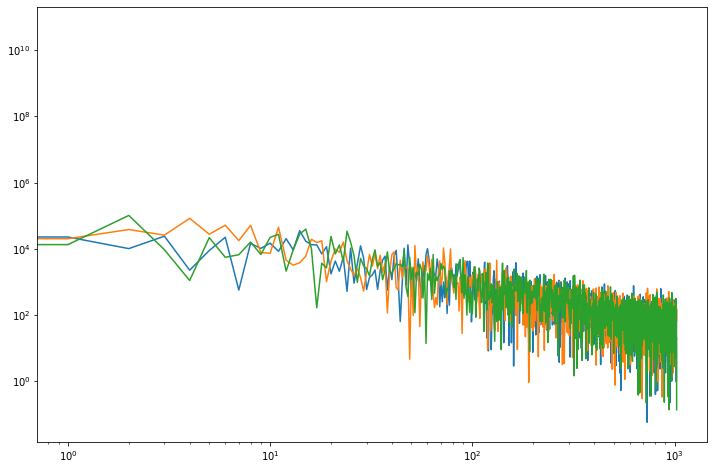

In [45]:
fig,ax = plt.subplots(figsize=(12,8))

ax.loglog(data0['u_fft'][500])
ax.loglog(data1['u_fft'][500])
ax.loglog(data2['u_fft'][500])

plt.show()

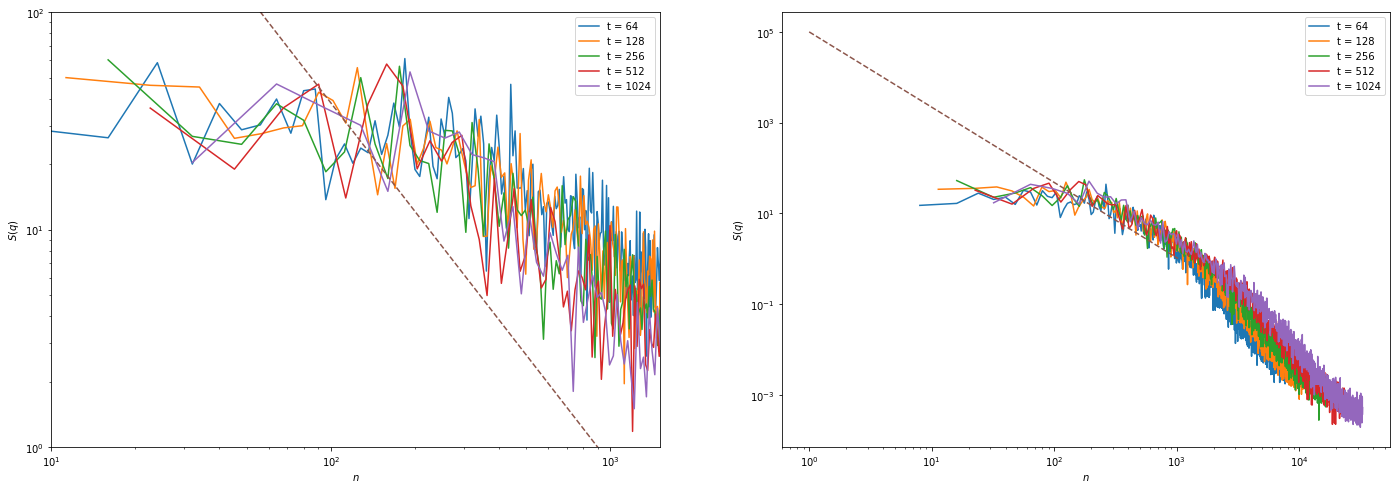

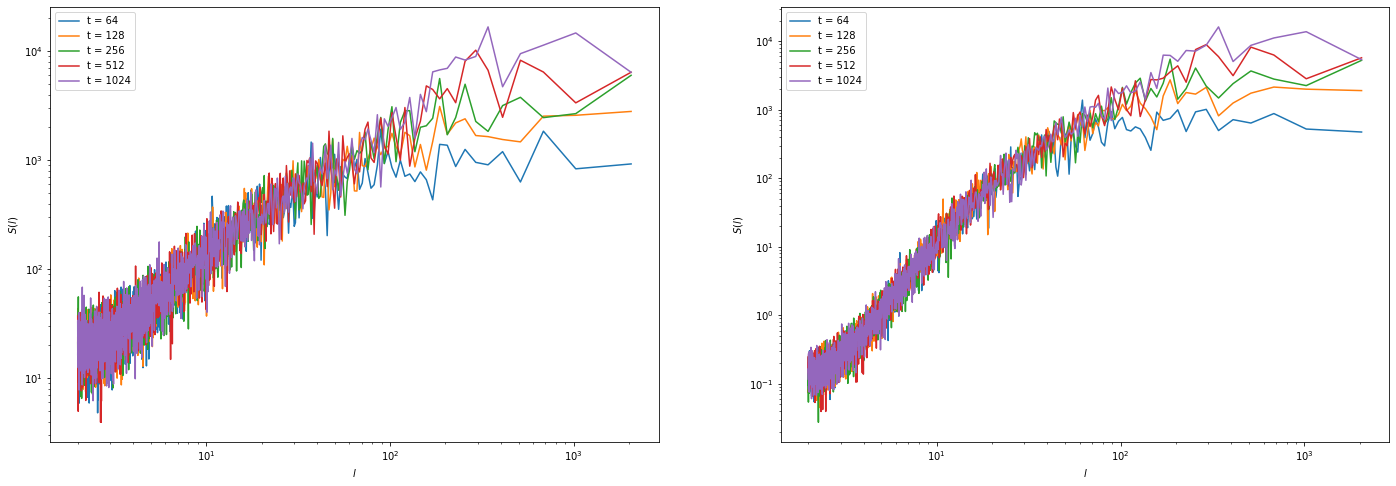

In [74]:
fig,ax = plt.subplots(1,2,figsize=(24,8))
fig1,ax1 = plt.subplots(1,2,figsize=(24,8))

L = 2048

t_id = [2**6,2**7,2**8,2**9,2**10] 
nv = np.arange(1,L//2+1)
q = nv / L
l = q**-1

zeta = .33
z = 2


for t_ in t_id:
    ax[0].loglog(nv*t_**(1/z),u_fft[t_][1:]/t_**((1+2*zeta)/z),label='t = '+str(t_))
    ax[1].loglog(nv*t_**(1/z),u_fft1[t_][1:]/t_**((1+2*zeta)/z),label='t = '+str(t_))
    ax1[0].loglog(l,u_fft[t_][1:],label='t = '+str(t_))
    ax1[1].loglog(l,u_fft1[t_][1:],label='t = '+str(t_))


ax[0].loglog(nv,8e4*nv**-(1+2*zeta),'--')
ax[1].loglog(nv,1e5*nv**-(1+2*zeta),'--')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$S(q)$')
ax[1].set_xlabel(r'$n$')
ax[1].set_ylabel(r'$S(q)$')
ax1[0].legend()
ax1[1].legend()
ax1[0].set_xlabel(r'$l$')
ax1[0].set_ylabel(r'$S(l)$')
ax1[1].set_xlabel(r'$l$')
ax1[1].set_ylabel(r'$S(l)$')
ax[0].set_xlim(10,1500)
ax[0].set_ylim(1,1e2)
#ax[1].set_xlim(10,300)
#ax[1].set_ylim(10,1e4)
plt.show()

In [8]:
t_max = 1200
width = 0
u_sigma = 0
u_sigma1 = 0
u_cm = 0
u_cm1 = 0
I_max = 0

for i in range(n):
    width += data[i]['width'][:t_max]
    u_sigma += data[i]['u_sigma'][:t_max]
    u_sigma1 += data[i]['u_sigma1'][:t_max]
    u_cm += data[i]['u_cm'][:t_max]
    u_cm1 += data[i]['u_cm1'][:t_max]
    I_max += data[i]['I_max'][:t_max]
width /= n
u_sigma /= n
u_sigma1 /= n
u_cm /= n
u_cm1 /= n
I_max /= n
t = data[0]['t'][:t_max]

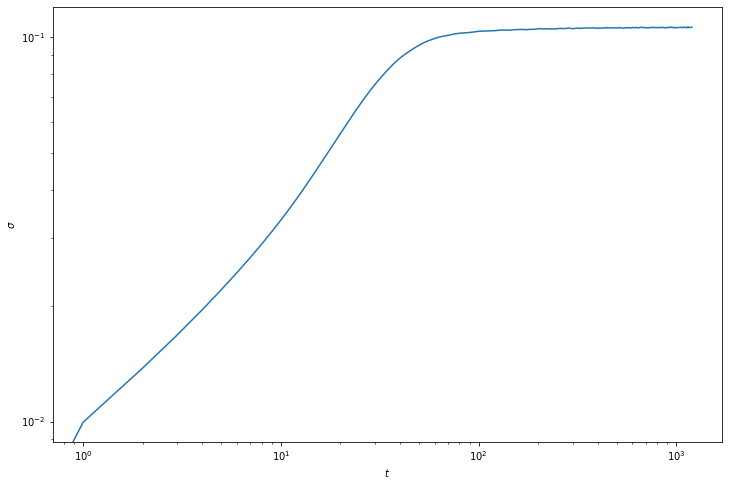

In [9]:
fig,ax = plt.subplots(figsize=(12,8))

ax.loglog(t,width)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\sigma$')

plt.show()

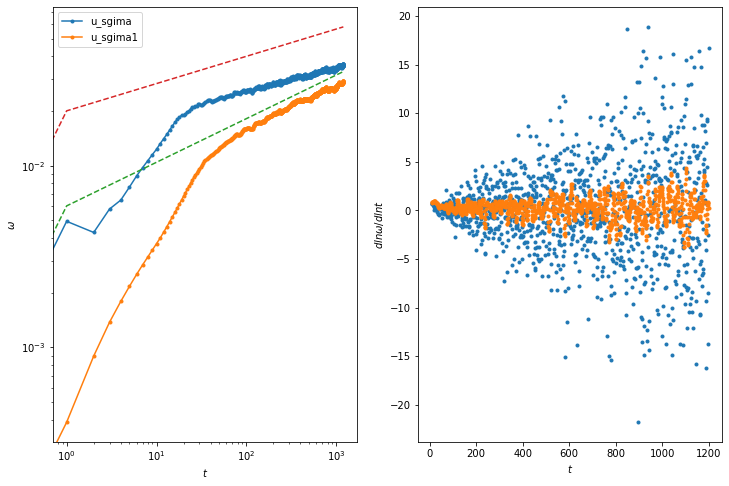

0.14988553391827938
0.24263633714485167


In [62]:
fig,ax = plt.subplots(1,2,figsize=(12,8))

ax[0].loglog(t,u_sigma,'.-',label = 'u_sgima')
ax[0].loglog(t,u_sigma1,'.-',label = 'u_sgima1')
ax[0].loglog(t,6e-3*t**.24,'--')
ax[0].loglog(t,.2e-1*t**.15,'--')
#ax[1].plot(np.log(t[1:]),np.log(u_sigma[1:]))
dt = 1
ti =10
ax[1].plot(t[ti:-dt:dt],np.diff(np.log(u_sigma[ti::dt]))/np.diff(np.log(t[ti::dt])),'.')
ax[1].plot(t[ti:-dt:dt],np.diff(np.log(u_sigma1[ti::dt]))/np.diff(np.log(t[ti::dt])),'.')

ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$\omega$')
ax[0].legend()
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$dln\omega/dlnt$')
#ax[1].set_xlim(100,500)
plt.show()

print(np.mean((np.diff(np.log(u_sigma[ti::dt]))/np.diff(np.log(t[ti::dt])))[100:]))
print(np.mean((np.diff(np.log(u_sigma1[ti::dt]))/np.diff(np.log(t[ti::dt])))[100:]))

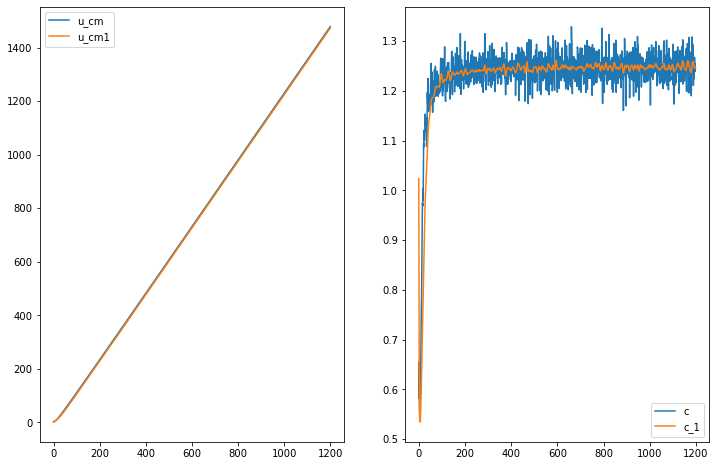

In [43]:
fig,ax = plt.subplots(1,2,figsize=(12,8))

ax[0].plot(t,u_cm,label = 'u_cm')
ax[0].plot(t,u_cm1,label = 'u_cm1')
ax[1].plot(t[:-1],np.diff(u_cm)/np.diff(t),label = 'c')
ax[1].plot(t[:-1],np.diff(u_cm1)/np.diff(t),label = 'c_1')
ax[0].legend()
ax[1].legend()

plt.legend()
plt.show()

## 0806

In [76]:
data1 = np.load('data/da_0806_1.npz')
L = 4096

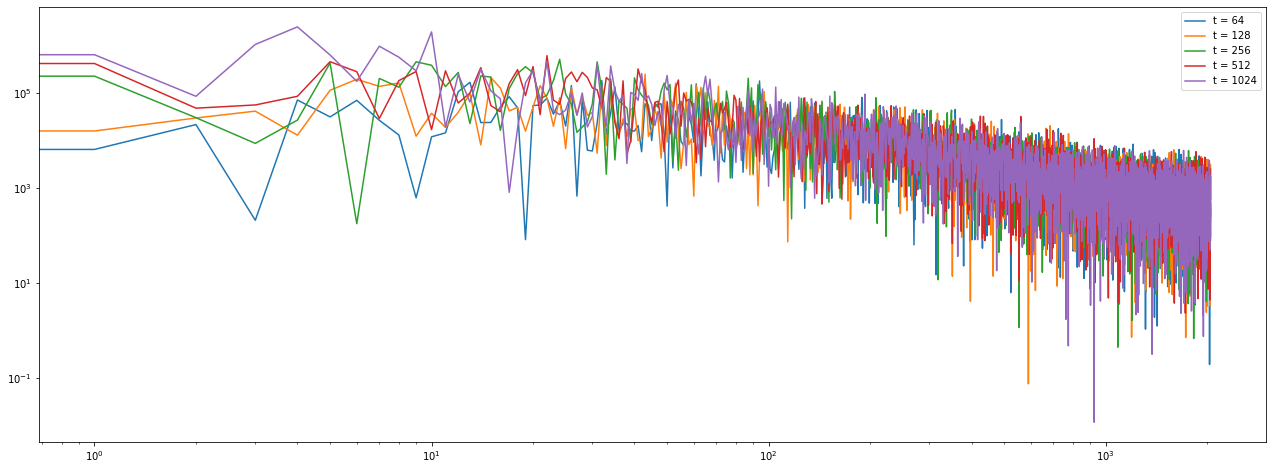

In [77]:
t = [2**i for i in np.arange(6,11)]

fig,ax = plt.subplots(figsize=(22,8))
n = np.arange(1,L//2+1)
q = n/L
l = q**-1 

for t_ in t:
    ax.loglog(data1['u_fft'][t_][1:],label = 't = ' + str(t_))
#ax.set_xlim(10,100)
#ax.set_ylim(10,1e6)
ax.legend()

plt.show()

In [122]:
width = data1['width']
u_sigma = data1['u_sigma']
u_sigma1 = data1['u_sigma1']
u_cm = data1['u_cm']
u_cm1 = data1['u_cm1']
I_max = data1['I_max']
t = data1['t']


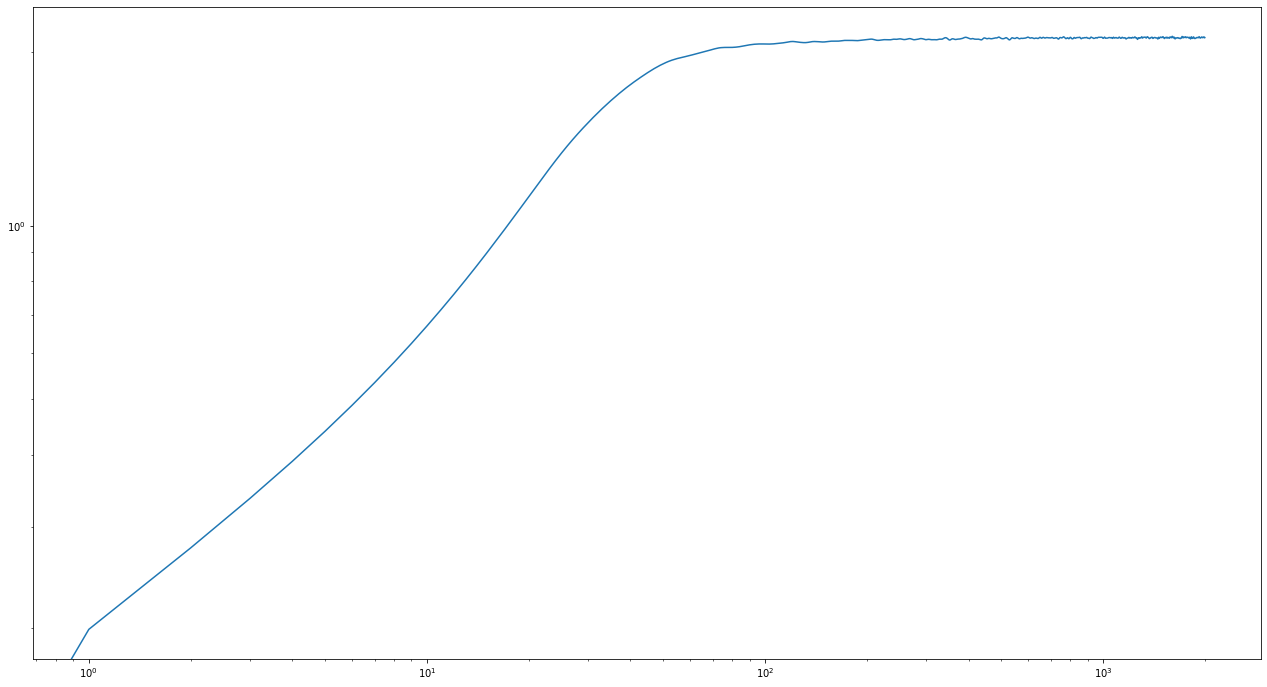

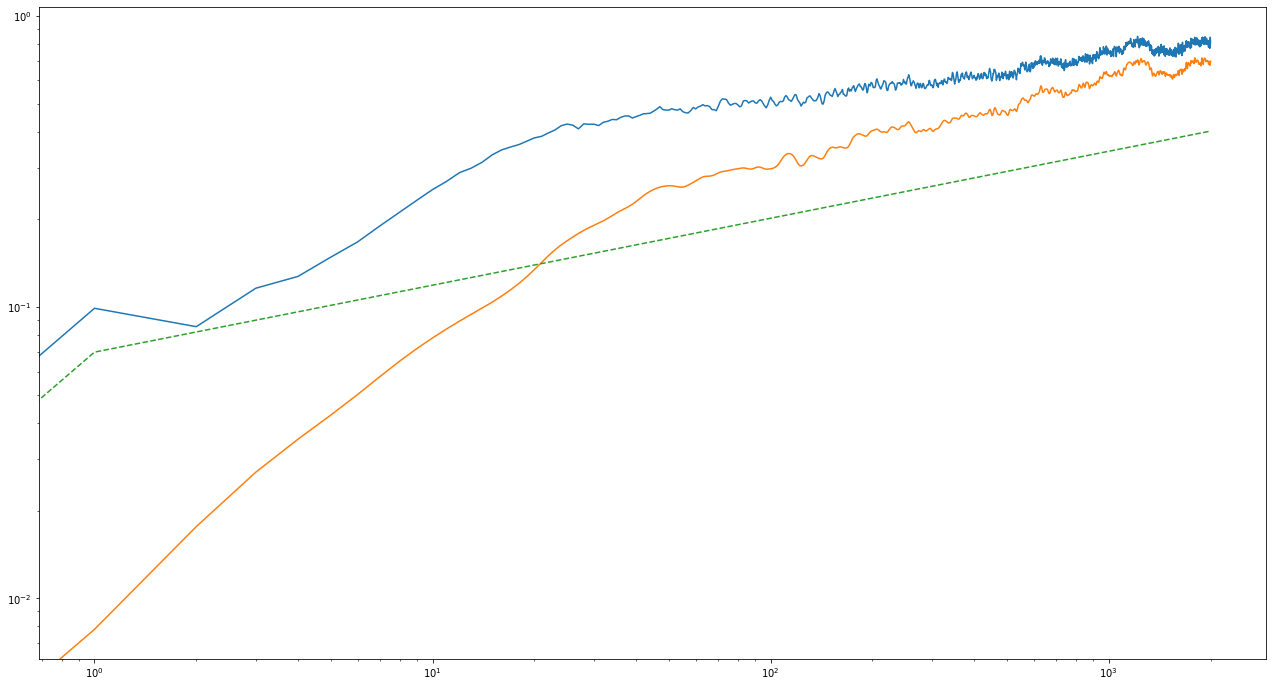

In [123]:
plt.figure(figsize=(22,12))
plt.loglog(t,width)
plt.figure(figsize=(22,12))
plt.plot(t,u_sigma)
plt.plot(t,u_sigma1)
plt.plot(t,.7e-1*t**.23,'--')
plt.show()

In [89]:
ni = 1
nf = 8
nv = np.arange(ni,nf)

t_max = 1200
u_fft = (np.load('data/da_0906_1.npz')['u_fft'][:t_max] + np.load('data/da_0906_3.npz')['u_fft'][:t_max] + np.load('data/da_0906_4.npz')['u_fft'][:t_max] + np.load('data/da_0906_6.npz')['u_fft'][:t_max])/4

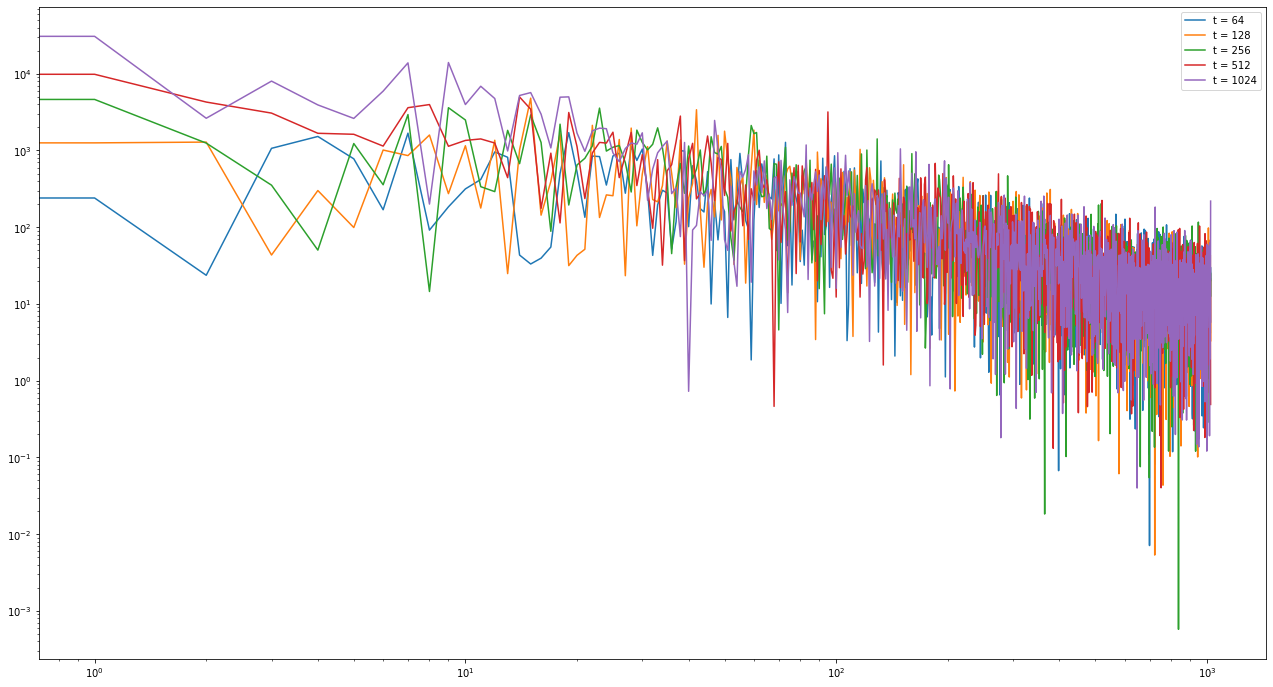

In [87]:
fig,ax = plt.subplots(figsize = (22,12))

t = [2**i for i in range(6,11)]

for t_ in t:
    ax.loglog(u_fft[t_][1:],label ='t = ' + str(t_))


ax.legend()

plt.show()

## 1006

In [27]:
from system import *
import cupy as cp
import matplotlib.pyplot as plt 

s1 = System(4096,1024)
s1.gamma = .2
s1.D = 1
s1.set_dic_beta(p=.5)
s1.set_plane_initial_conditions()

s2 = System(4096,1024)
s2.gamma = .2
s2.D = 1
s2.set_dic_beta(p=.5)
s2.set_plane_initial_conditions()

In [28]:
for _ in range(1000):
    s1.update()
    s1.rigid_x()

In [29]:
for _ in range(1000):
    s2.update2()
    s2.rigid_x()

In [30]:
print(s1.u_cm())
print(s2.u_cm())

107.0009765625
107.03515625


In [4]:
cp.sqrt(s1.u2() - s1.u1()**2).mean()

array(9.93298762)

In [5]:
cp.sqrt(s2.u2() - s2.u1()**2).mean()

array(10.00567453)

## 1106

In [7]:
data = np.load('data/da_1106_1.npz')
dataS0 = np.load('data/S0_da_1106_0.npz')

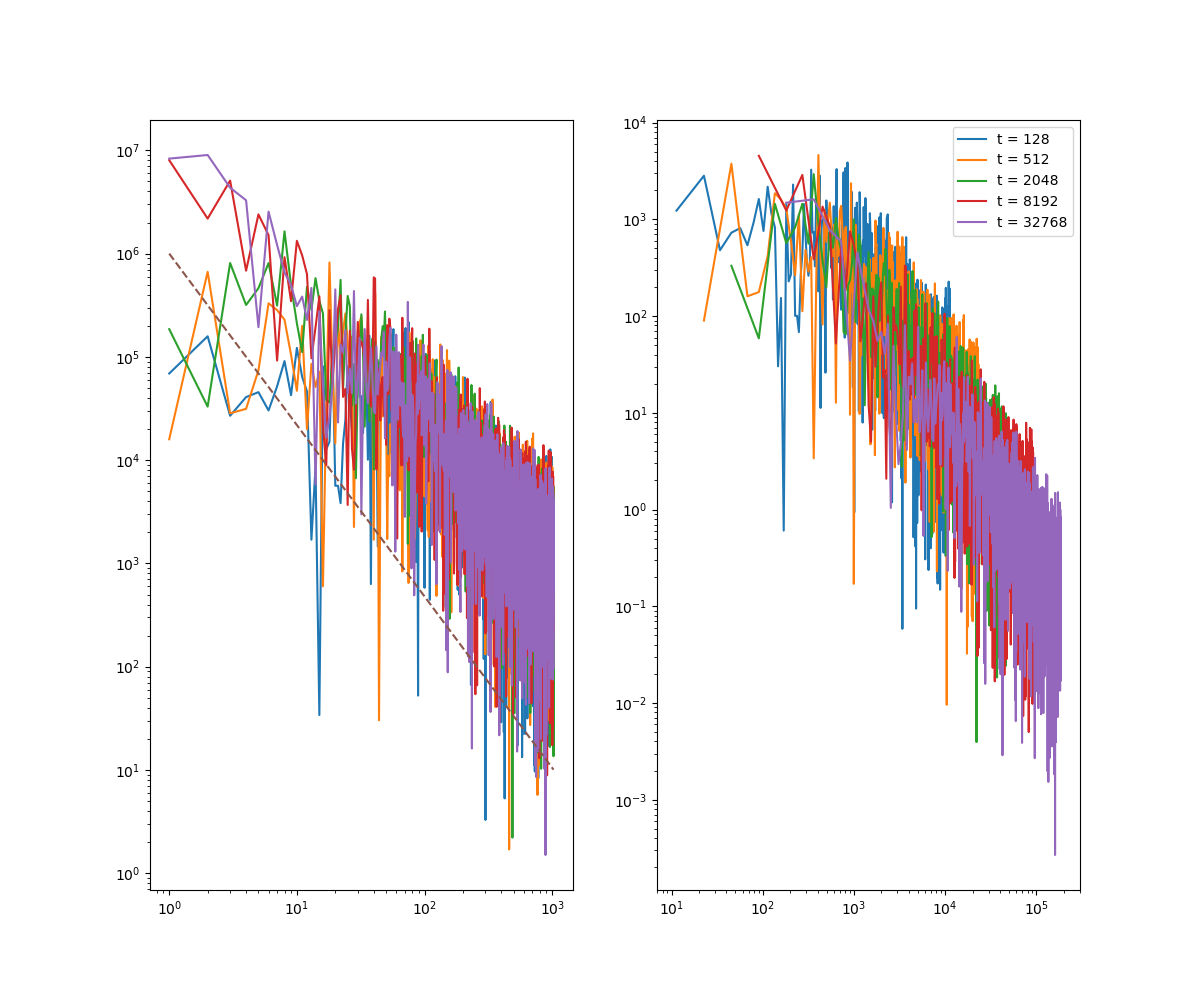

In [4]:
fig,ax = plt.subplots(1,2,figsize=(12,10))
L = 2048
nv = np.arange(1,L//2+1)

zeta = 0.33
z = 2
beta = .15

for i in range(6,15,2):
    t = 2**(i+1)
    ax[0].loglog(nv,data['u_fft'][i][1:],label = 't = ' + str(t))
    ax[1].loglog(nv*t**(1/z),data['u_fft'][i][1:]*t**-((1+2*zeta)/z),label = 't = ' + str(t))
naux = np.linspace(1,1e5,int(1e5))
ax[0].loglog(nv,1e6*nv**-(1+2*zeta),'--')
    
#ax[0].set_ylim(50,1e8)    
plt.legend()
plt.show()

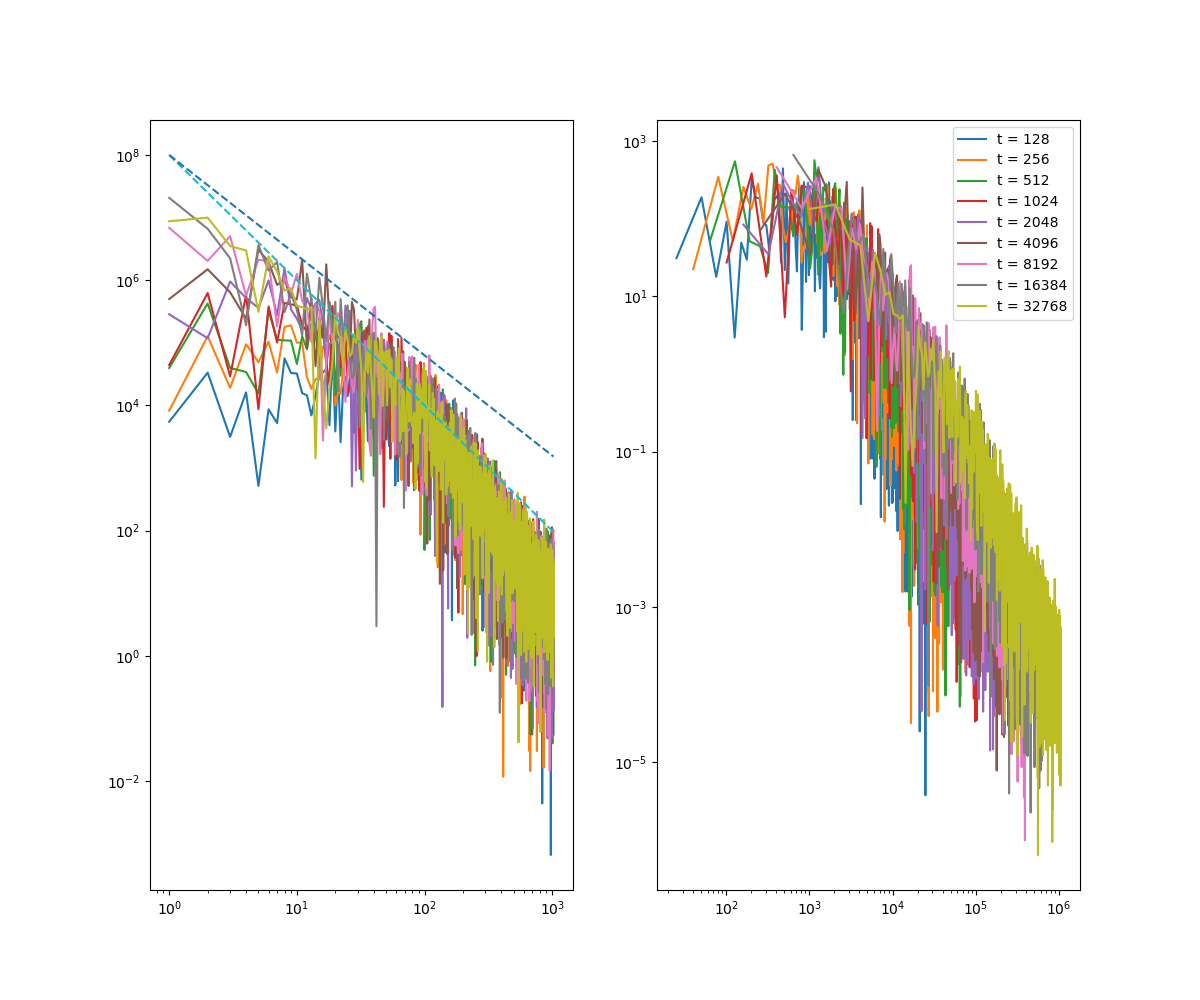

In [22]:
fig,ax = plt.subplots(1,2,figsize=(12,10))

L = 2048
nv = np.arange(1,L//2+1)

zeta_kpz = .5
zeta = .3
z = 1.5
beta = 1/3

for i in range(6,15,1):
    t = 2**(i+1)
    ax[0].loglog(nv,data['u_fft1'][i][1:],label = 't = ' + str(t))
    ax[1].loglog(nv*t**(1/z),data['u_fft1'][i][1:]*t**-((1+2*zeta)/z),label = 't = ' + str(t))
ax[0].loglog(nv,1e8*nv**-(1+2*zeta_kpz),'--')
ax[0].loglog(nv,1e8*nv**-(1+2*zeta),'--')
#ax.set_ylim(50,1e8)
plt.legend()
plt.show()

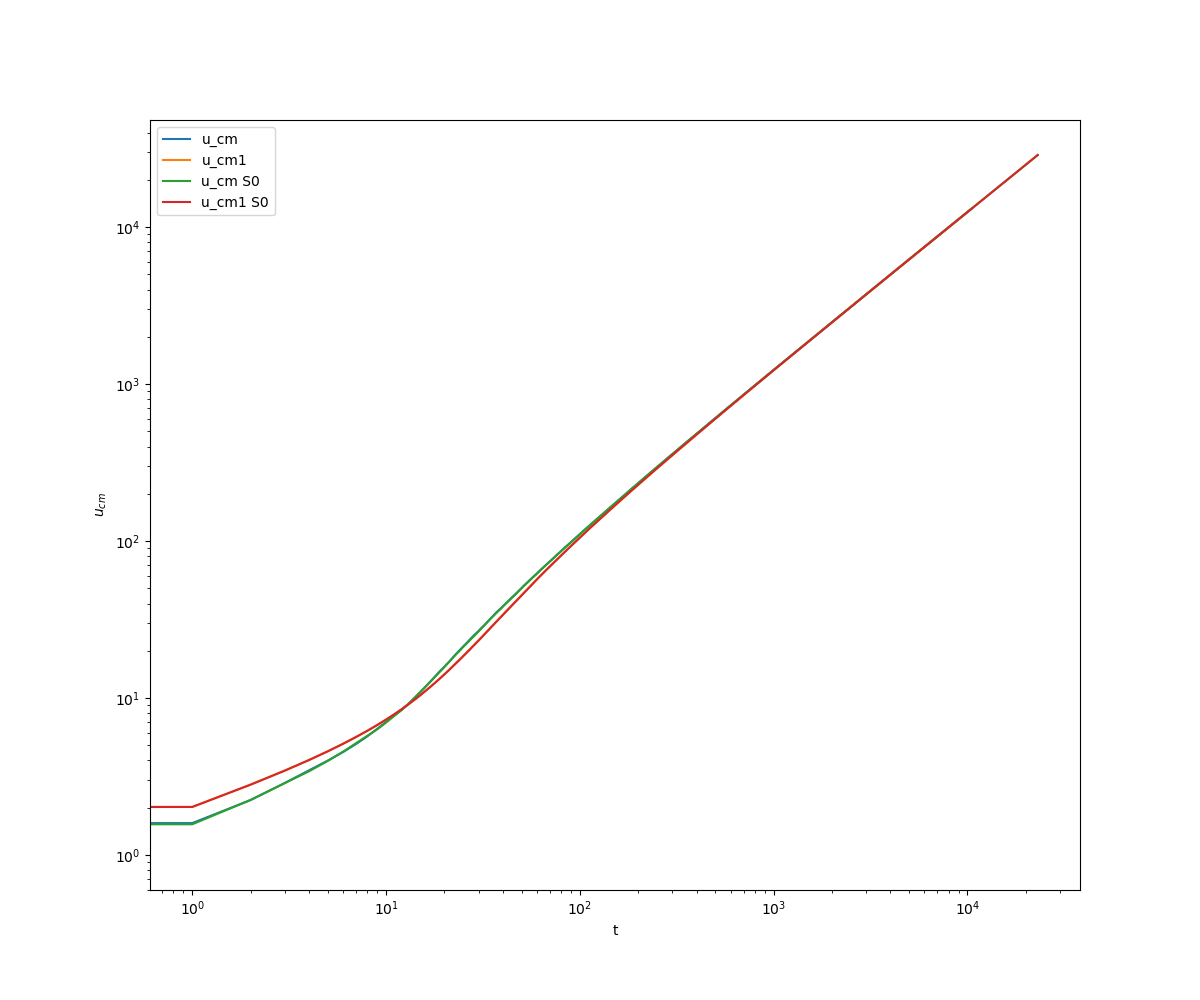

In [11]:
plt.figure(figsize=(12,10))

plt.loglog(data['t'],data['u_cm'],label = 'u_cm')
plt.loglog(data['t'],data['u_cm1'],label = 'u_cm1')
plt.loglog(dataS0['t'],dataS0['u_cm'],label = 'u_cm S0')
plt.loglog(dataS0['t'],dataS0['u_cm1'],label = 'u_cm1 S0')
plt.xlabel('t')
plt.ylabel(r'$u_{cm}$')
plt.legend()
plt.show()

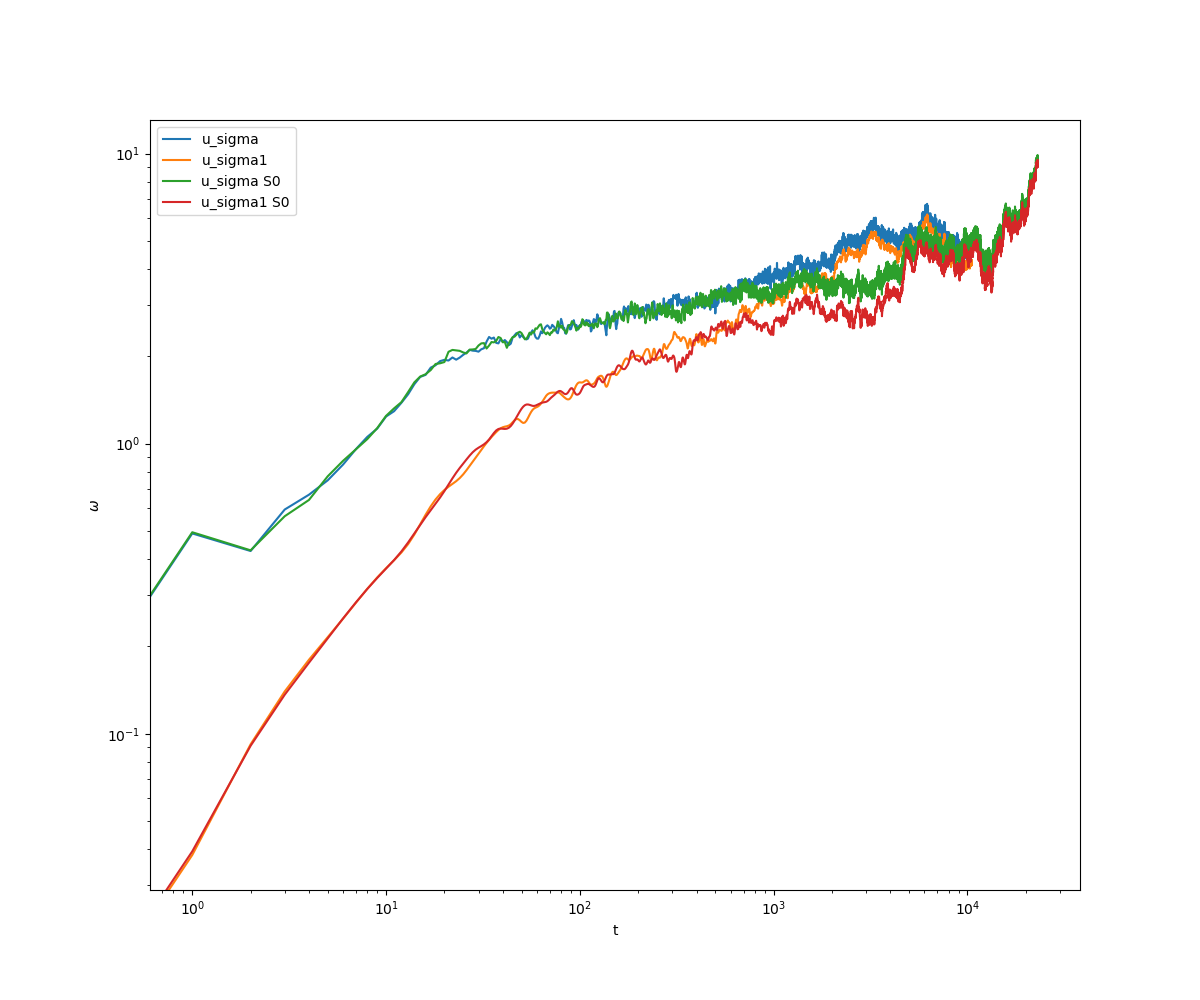

In [9]:
plt.figure(figsize=(12,10))

plt.loglog(data['t'],data['u_sigma'],label = 'u_sigma')
plt.loglog(data['t'],data['u_sigma1'],label = 'u_sigma1')
plt.loglog(dataS0['t'],dataS0['u_sigma'],label = 'u_sigma S0')
plt.loglog(dataS0['t'],dataS0['u_sigma1'],label = 'u_sigma1 S0')
plt.xlabel('t')
plt.ylabel(r'$\omega$')

plt.legend()
plt.show()

In [3]:
data16 = np.load('data/Ly_16_da_1106_0.npz')
data32 = np.load('data/Ly_32_da_1106_0.npz')
data64 = np.load('data/Ly_64_da_1106_0.npz')
data128 = np.load('data/Ly_128_da_1106_0.npz')
data256 = np.load('data/Ly_256_da_1106_0.npz')
data512 = np.load('data/Ly_512_da_1106_0.npz')
data1024 = np.load('data/Ly_1024_da_1106_0.npz')
data2048 = np.load('data/Ly_2048_da_1106_0.npz')
data4096 = np.load('data/Ly_4096_da_1106_0.npz')

In [5]:
%matplotlib widget

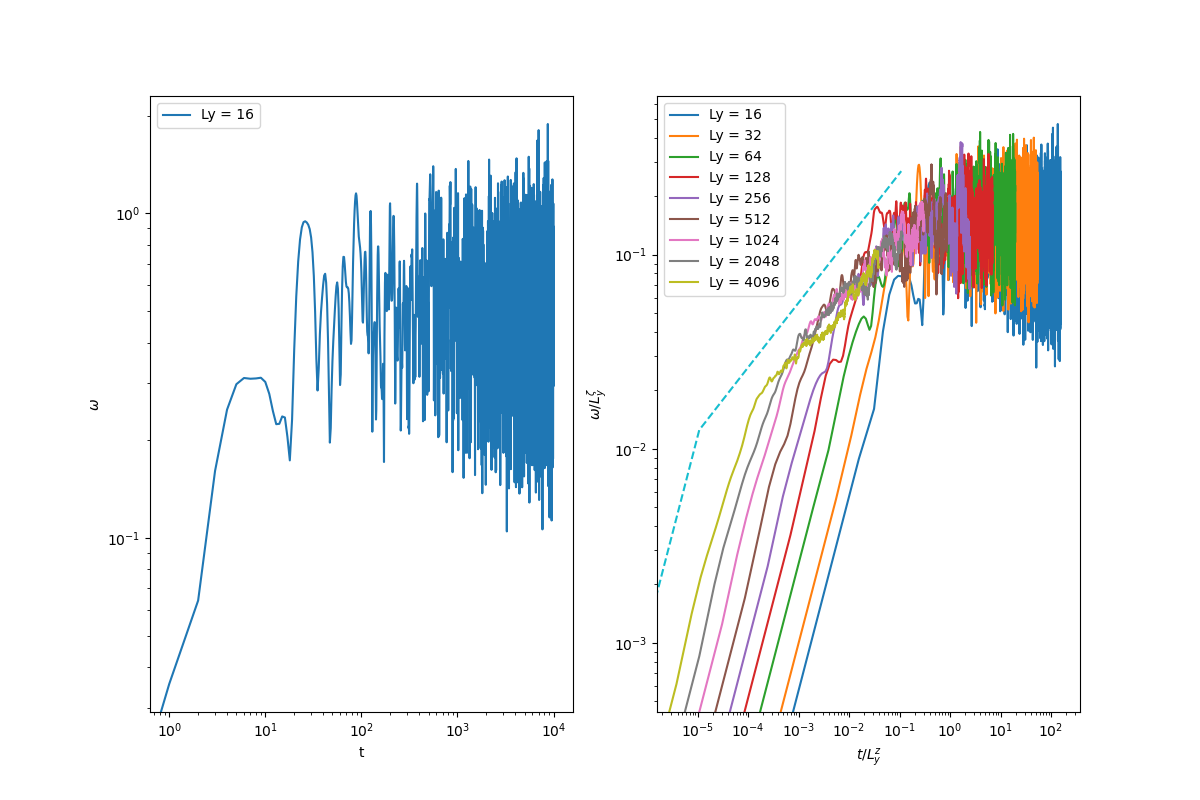

In [4]:
fig,ax = plt.subplots(1,2,figsize=(12,8))

#Anda bastante bien KPZ
zeta = .5
z = 1.5
beta = 1/3

ax[0].loglog(data16['t'],data16['u_sigma1'],label = 'Ly = 16')
#ax[0].loglog(data32['t'],data32['u_sigma1'],label = 'Ly = 32')
#ax[0].loglog(data64['t'],data64['u_sigma1'],label = 'Ly = 64')
#ax[0].loglog(data128['t'],data128['u_sigma1'],label = 'Ly = 128')
#ax[0].loglog(data256['t'],data256['u_sigma1'],label = 'Ly = 256')
#ax[0].loglog(data512['t'],data512['u_sigma1'],label = 'Ly = 512')
#ax[0].loglog(data1024['t'],data1024['u_sigma1'],label = 'Ly = 1024')
#ax[0].loglog(data2048['t'],data2048['u_sigma1'],label = 'Ly = 2048')
#ax[0].loglog(data4096['t'],data4096['u_sigma1'],label = 'Ly = 4096')
#ax[0].set_ylim(.8,8)
ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$\omega$')
ax[0].legend()


ax[1].loglog(data16['t']/16**z,data16['u_sigma1']/16**zeta,label = 'Ly = 16')
ax[1].loglog(data32['t']/32**z,data32['u_sigma1']/32**zeta,label = 'Ly = 32')
ax[1].loglog(data64['t']/64**z,data64['u_sigma1']/64**zeta,label = 'Ly = 64')
ax[1].loglog(data128['t']/128**z,data128['u_sigma1']/128**zeta,label = 'Ly = 128')
ax[1].loglog(data256['t']/256**z,data256['u_sigma1']/256**zeta,label = 'Ly = 256')
ax[1].loglog(data512['t']/512**z,data512['u_sigma1']/512**zeta,label = 'Ly = 512')
ax[1].loglog(data1024['t']/1024**z,data1024['u_sigma1']/1024**zeta,label = 'Ly = 1024')
ax[1].loglog(data2048['t']/2048**z,data2048['u_sigma1']/2048**zeta,label = 'Ly = 2048')
ax[1].loglog(data4096['t']/4096**z,data4096['u_sigma1']/4096**zeta,label = 'Ly = 4096')
ax[1].loglog(data2048['t']/2048**z,.1*(data2048['t']/64**z)**beta,'--')
ax[1].set_xlabel(r'$t/L_y^z$')
ax[1].set_ylabel(r'$\omega/L_y^\zeta$')

#ax[1].set_ylim(.1,1.1)
ax[1].legend()

plt.show()

In [11]:
a = np.array([1])
a[0] += 1
a 

array([2])

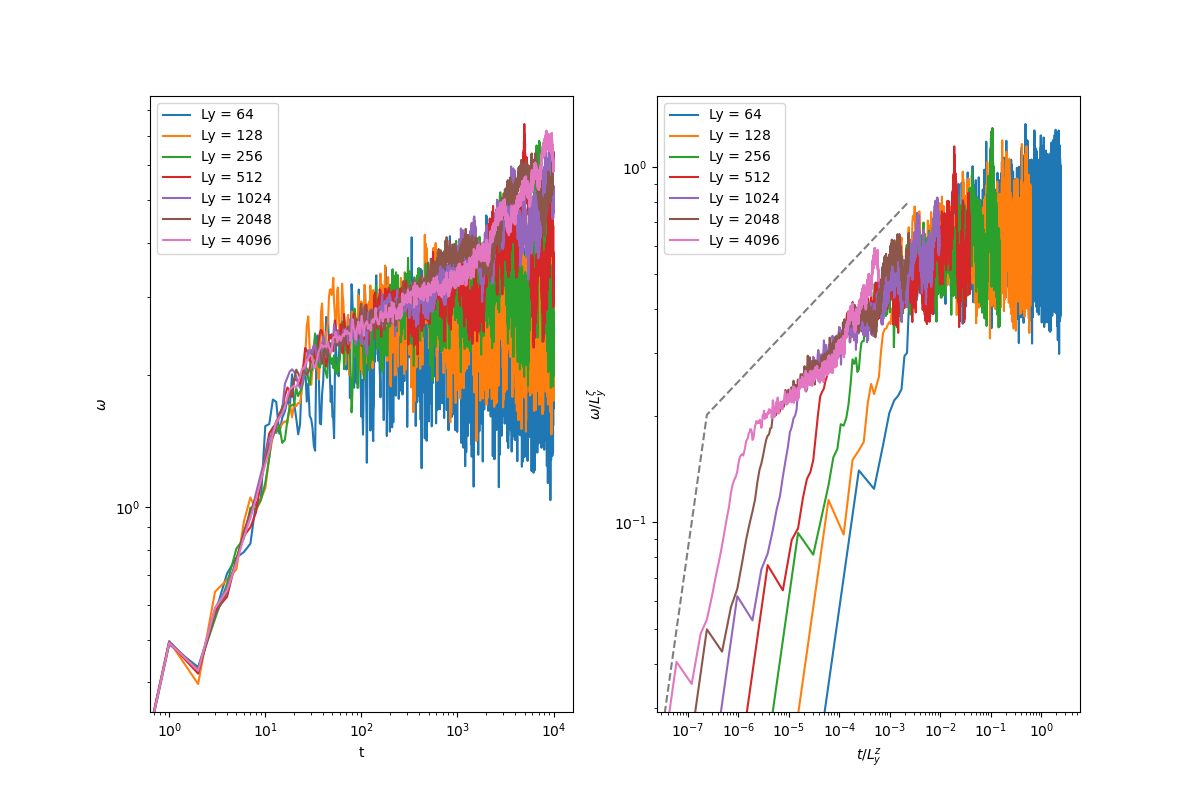

In [25]:
fig,ax = plt.subplots(1,2,figsize=(12,8))

zeta = .3
z = 2
beta = .15

#ax[0].loglog(data16['t'],data16['u_sigma'],label = 'Ly = 16')
#ax[0].loglog(data32['t'],data32['u_sigma'],label = 'Ly = 32')
ax[0].loglog(data64['t'],data64['u_sigma'],label = 'Ly = 64')
ax[0].loglog(data128['t'],data128['u_sigma'],label = 'Ly = 128')
ax[0].loglog(data256['t'],data256['u_sigma'],label = 'Ly = 256')
ax[0].loglog(data512['t'],data512['u_sigma'],label = 'Ly = 512')
ax[0].loglog(data1024['t'],data1024['u_sigma'],label = 'Ly = 1024')
ax[0].loglog(data2048['t'],data2048['u_sigma'],label = 'Ly = 2048')
ax[0].loglog(data4096['t'],data4096['u_sigma'],label = 'Ly = 4096')
#ax[0].set_ylim(.8,8)
ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$\omega$')
ax[0].legend()


#ax[1].loglog(data16['t']/16**z,data16['u_sigma1']/16**zeta,label = 'Ly = 16')
#ax[1].loglog(data32['t']/32**z,data32['u_sigma1']/32**zeta,label = 'Ly = 32')
ax[1].loglog(data64['t']/64**z,data64['u_sigma']/64**zeta,label = 'Ly = 64')
ax[1].loglog(data128['t']/128**z,data128['u_sigma']/128**zeta,label = 'Ly = 128')
ax[1].loglog(data256['t']/256**z,data256['u_sigma']/256**zeta,label = 'Ly = 256')
ax[1].loglog(data512['t']/512**z,data512['u_sigma']/512**zeta,label = 'Ly = 512')
ax[1].loglog(data1024['t']/1024**z,data1024['u_sigma']/1024**zeta,label = 'Ly = 1024')
ax[1].loglog(data2048['t']/2048**z,data2048['u_sigma']/2048**zeta,label = 'Ly = 2048')
ax[1].loglog(data4096['t']/4096**z,data4096['u_sigma']/4096**zeta,label = 'Ly = 4096')
ax[1].loglog(data2048['t']/2048**z,.7*(data64['t']/64**z)**beta,'--')
ax[1].set_xlabel(r'$t/L_y^z$')
ax[1].set_ylabel(r'$\omega/L_y^\zeta$')

#ax[1].set_ylim(.1,1.1)
ax[1].legend()

plt.show()

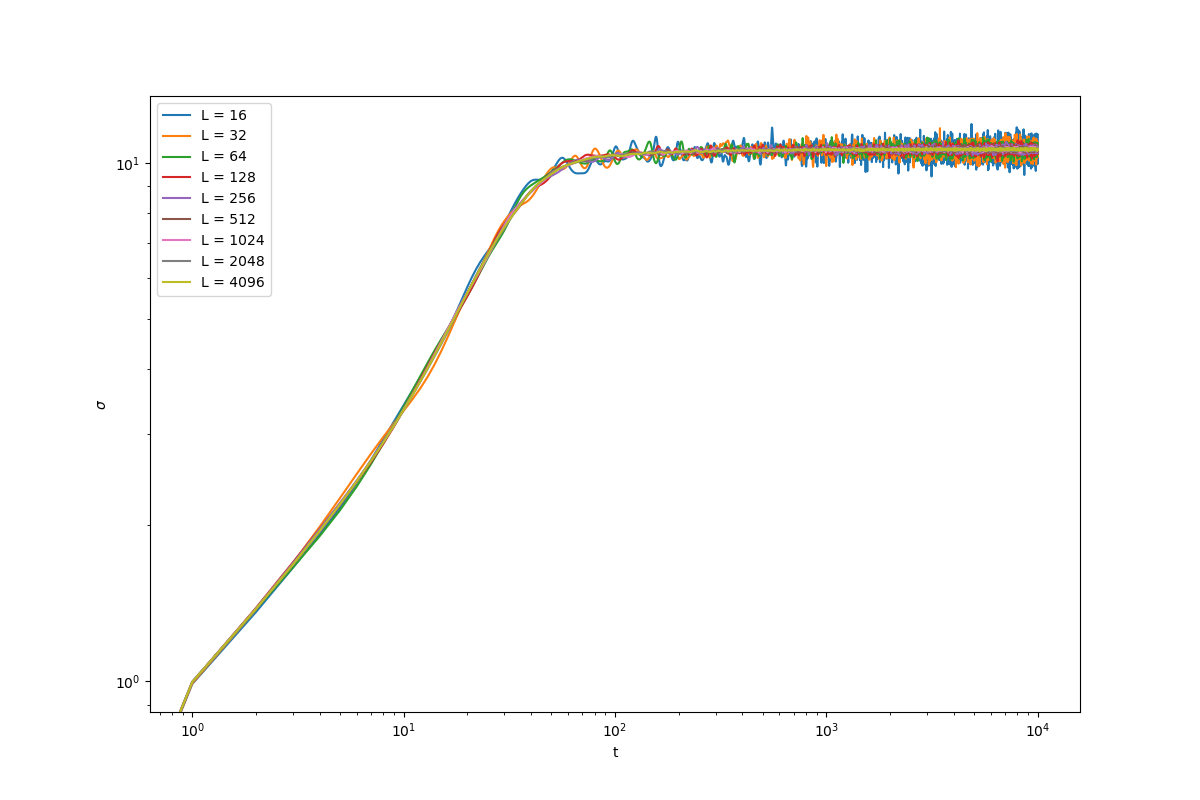

In [5]:
plt.figure(figsize=(12,8))

plt.loglog(data16['t'],data16['width'],label = 'L = 16')
plt.loglog(data32['t'],data32['width'],label = 'L = 32')
plt.loglog(data64['t'],data64['width'],label = 'L = 64')
plt.loglog(data128['t'],data128['width'],label = 'L = 128')
plt.loglog(data256['t'],data256['width'],label = 'L = 256')
plt.loglog(data512['t'],data512['width'],label = 'L = 512')
plt.loglog(data1024['t'],data1024['width'],label = 'L = 1024')
plt.loglog(data2048['t'],data2048['width'],label = 'L = 2048')
plt.loglog(data4096['t'],data4096['width'],label = 'L = 4096')
plt.xlabel('t')
plt.ylabel(r'$\sigma$')
plt.legend()
plt.show()

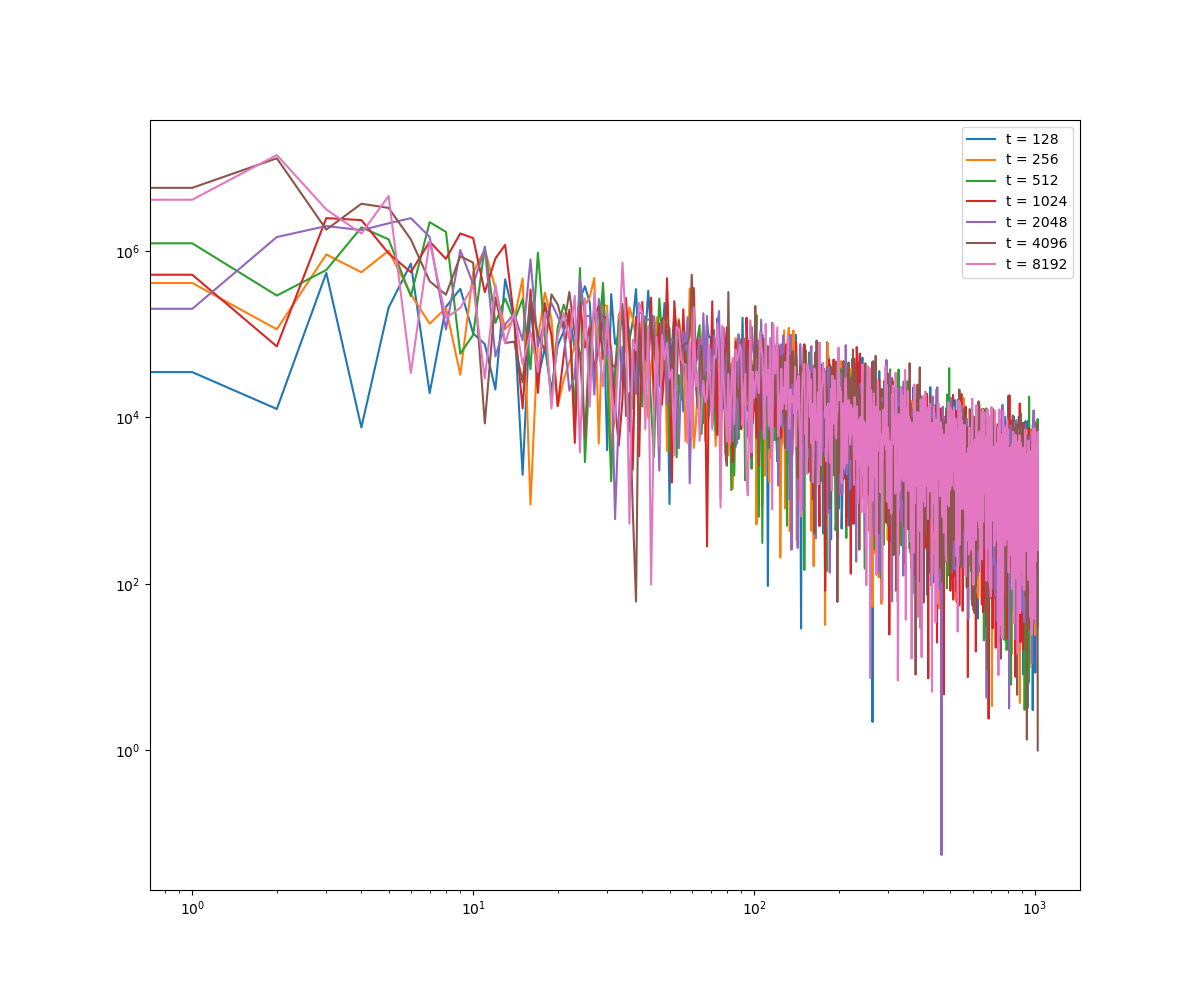

In [9]:
plt.figure(figsize=(12,10))

plt.loglog(data2048['u_fft'][6][1:],label = 't = 128')
plt.loglog(data2048['u_fft'][7][1:],label = 't = 256')
plt.loglog(data2048['u_fft'][8][1:],label = 't = 512')
plt.loglog(data2048['u_fft'][9][1:],label = 't = 1024')
plt.loglog(data2048['u_fft'][10][1:],label = 't = 2048')
plt.loglog(data2048['u_fft'][11][1:],label = 't = 4096')
plt.loglog(data2048['u_fft'][12][1:],label = 't = 8192')
#plt.xlim(1,500)
#plt.ylim(10**3,10**8)


plt.legend()
plt.show()

## 1206

In [49]:
data = np.load('data/da_1206_0.npz')
dataS0 = np.load('data/S0_da_1206_0.npz')

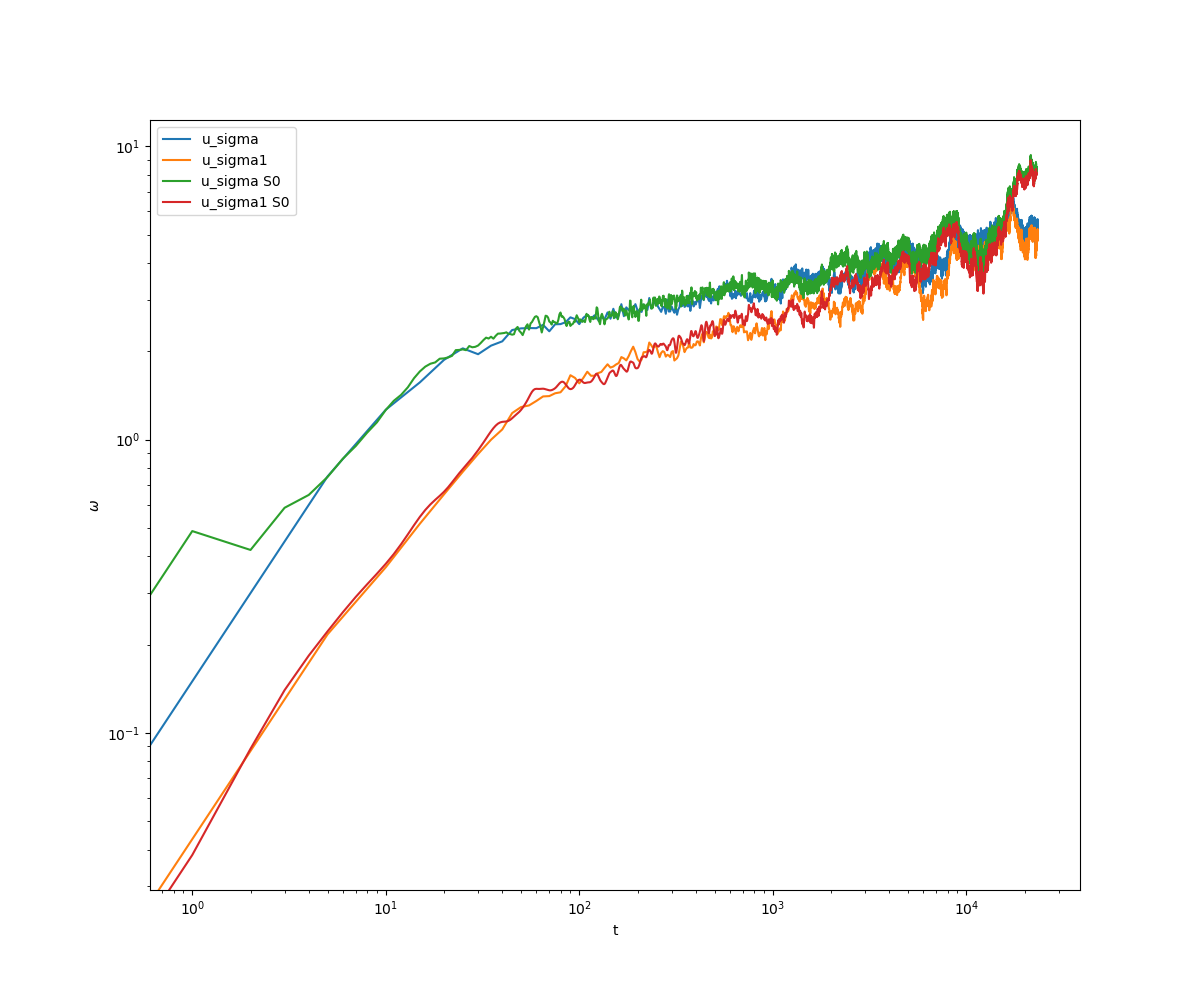

In [41]:
plt.figure(figsize=(12,10))

plt.loglog(data['t'],data['u_sigma'],label = 'u_sigma')
plt.loglog(data['t'],data['u_sigma1'],label = 'u_sigma1')
plt.loglog(dataS0['t'],dataS0['u_sigma'],label = 'u_sigma S0')
plt.loglog(dataS0['t'],dataS0['u_sigma1'],label = 'u_sigma1 S0')
plt.xlabel('t')
plt.ylabel(r'$\omega$')

plt.legend()
plt.show()

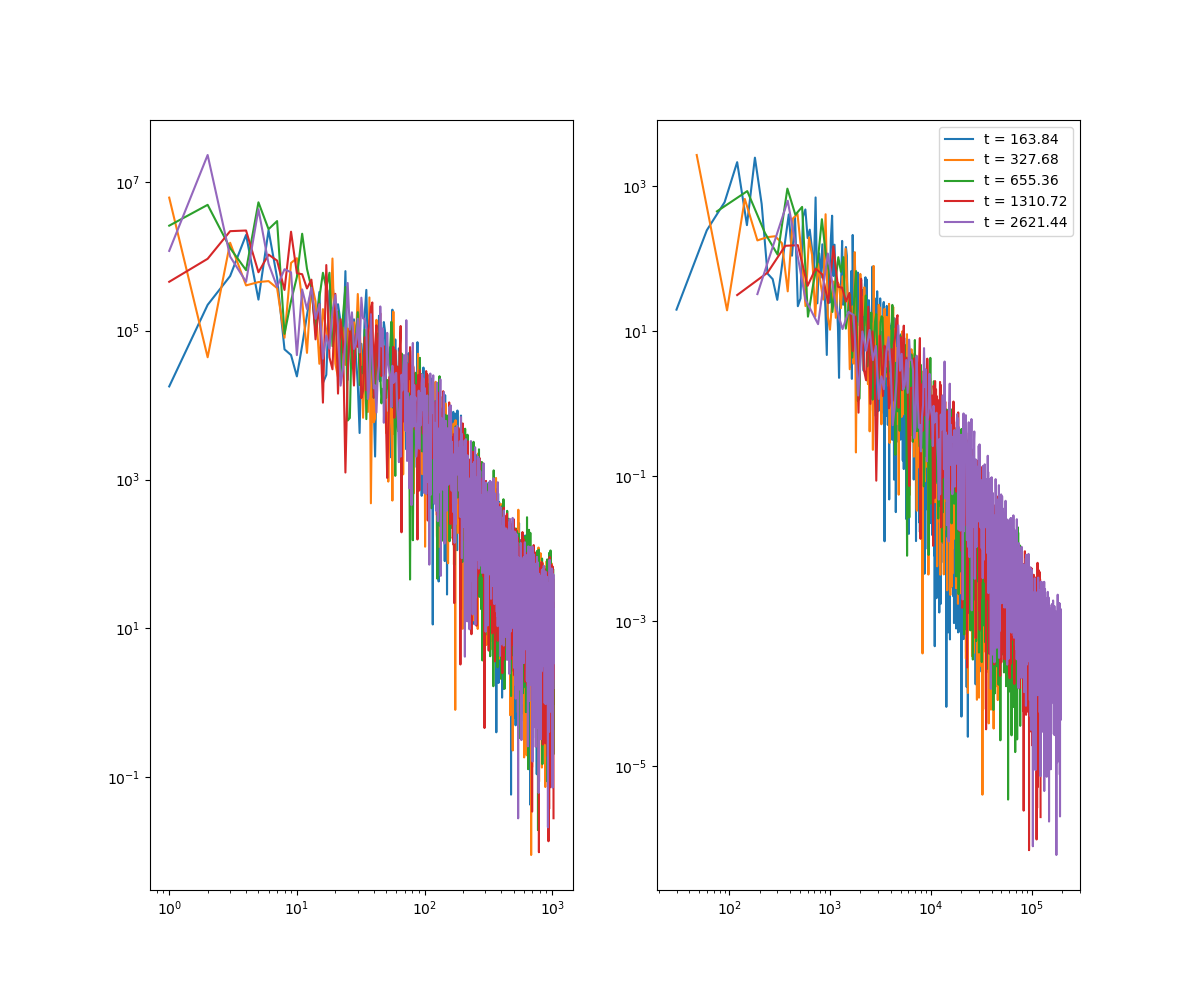

In [45]:
fig,ax = plt.subplots(1,2,figsize=(12,10))

L = 2048
nv = np.arange(1,L//2+1)

zeta = .5
z = 1.5
beta = 1/3

for i in range(13,18):
    t = 2**(i+1)*.01
    ax[0].loglog(nv,data['u_fft1'][i][1:],label = 't = ' + str(t))
    ax[1].loglog(nv*t**(1/z),data['u_fft1'][i][1:]*t**-((1+2*zeta)/z),label = 't = ' + str(t))
#ax[0].loglog(nv,1e6*nv**-(1-2*zeta))
#ax.set_ylim(50,1e8)
plt.legend()
plt.show()